### This tutorial was made such a way that it helps for my project as well as for the assignment. k -means clustering algorithm is one of the few algorithms I am using in my project.

Create an ipython notebook to provide a tutorial showing the steps to use a clustering algorithm from one of the following:
http://scikit-learn.org/stable/modules/clustering.html

or 

asscociation rules algorithm from:

https://github.com/asaini/Apriori

or

http://aimotion.blogspot.com/2013/01/machine-learning-and-data-mining.html

Your tutorial will  include

1. a short description of what the algorithm is used for ( and of the code to be used )

2. Data setup

3. Algorithm run

4. Display in graph and plots

5. Discussion of the images in the graphs and plots

6. Bibliography ( urls and names of pages and authors of used code and descriptions )

# 1. Short description

### Analysis using K-means clustering algorithm

K-means clustering algorithm divides the data into k disjoint clusters. In a k-means clustering algorithm, k intial centroids were chosen and each point is then assigned to the closest centroid. The collection of points that are closer to the centroid forms a cluster. In order to assign points in a dataset I have followed the steps below.

1. Initialize the centroids randomly
2. Assign each point in the dataset to one cluster so as that the within the cluster sum of squares is minimum.\
3. The resultant centroid now will be the mean of the points in the cluster


In [14]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from sklearn import datasets

# 2. Data Setup

###  Load the breast cancer data

#### Breast cancer data is one of the datasets that can be imported from the sklearn instead of reading it from the external website.

In [25]:
breast_cancer_data = datasets.load_breast_cancer()

In [26]:
df = pd.DataFrame(breast_cancer_data.data,columns=breast_cancer_data.feature_names)

In [27]:
print df.shape
pd.set_option('max_columns', len(df.columns))
df.head(2)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [28]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


It can be seen from the above dataframe that features have different variances which needs to be standardized.

### StandardScalar

If the features have very high difference in the variances then the points in the clusters are more likely to be separated.The breast cancer data has different variances which needs to be standardized. Standardscalar here helps in standardizing the data points by removing the mean and scaling each point to unit variance.

Standardization centeres the features around a mean of zero. 

In [29]:
std_scalar = StandardScaler() 
data_scaled = std_scalar.fit_transform(df)

# 3. Algorithm Run

In [30]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Now that we have standardized the data it's time to examine the cluster centers and lables.

In [31]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print centroids[0]
print labels[0:10]

[ 0.97397614  0.48151381  1.0066346   0.96352718  0.60925407  1.020696
  1.13942935  1.16458212  0.61113855  0.25222982  0.85859633  0.04274078
  0.86027888  0.8071077   0.01706063  0.69505052  0.63689512  0.77623856
  0.14038222  0.41503212  1.04008365  0.50631048  1.06597067  1.00315418
  0.60829274  0.95083725  1.04429844  1.14621103  0.59741617  0.62246932]
[0 0 0 0 0 0 0 0 0 0]


It can be observed that the variance in the centroids is very less

# 4. Graphs/ Plots and discussion of images

### The code below visualizes the breast cancer data

C:\Users\Nikitha\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


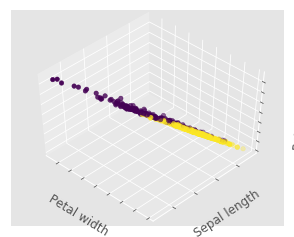

In [32]:

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = kmeans.labels_

ax.scatter(df.ix[:, 2], df.ix[:, 0], df.ix[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()

### Accuracy score

In order to get the 100% accuracy score the predicted lables must exactly match with the sample/true lables. In my case it is 52 % accurate. 

### Accuracy score varies withe the number of clusters choosen.
For example for the 2 clusters the accuaray score is arount 91% where as, for the 5 clusters the accuracy score is 52%.

In [33]:
metrics.accuracy_score(breast_cancer_data.target, labels)

0.91036906854130051

### Classification report

Here 0,1 are the class lables. 
Precision - The ability of the classifier not to label the negative sample as positive
recall -  The ability of the classifier to find the positive samples
F1-score - Mean of precision and recall
support - number of occurances of each class


In [34]:
print metrics.classification_report(breast_cancer_data.target, labels)

             precision    recall  f1-score   support

          0       0.93      0.83      0.87       212
          1       0.90      0.96      0.93       357

avg / total       0.91      0.91      0.91       569



 ## Silhouette Score
 
I have used silhouette score of a data point which measures it's similarity to its own cluster compared to its neighbouring clusters. Value ranges from -1 to 1, with higher values indicating that the data point matches well to its own cluster and not to its neighbouring clusters, and vice versa. The score of a cluster is the average of the score of all its constituent points, and the overall score is the average of all the clusters' scores. The silhouette score can be calculated by  the Euclidean distance (L2).

If the overall silhouette score is high, then the clustering is judged to have been done successfully. A low value may indicate that there too many or too few clusters, which in the case of KMeans would mean adjusting the value of k. 

In [35]:

print "The Silhouette score for k=2 is:",metrics.silhouette_score(data_scaled,labels)

The Silhouette score for k=2 is: 0.344974005103


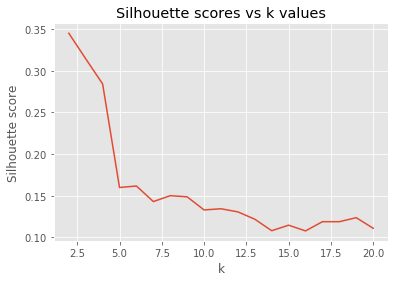

In [36]:
silhouette_scores = [None,None]
for i in range(2,21):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    labels_ = kmeans.labels_
    score = metrics.silhouette_score(data_scaled, labels_)
    silhouette_scores.append(score)
plt.plot(silhouette_scores)
plt.title("Silhouette scores vs k values")
plt.ylabel("Silhouette score")
plt.xlabel("k")
plt.show()

It can be seen that silhouette score decreases with the increasing values of k. Therefore at the higher values of k the clusters will be less.

# 5. Citations 


"Sklearn.metrics.precision_recall_fscore_support¶." Sklearn.metrics.precision_recall_fscore_support — scikit-learn 0.19.1 documentation. Accessed December 03, 2017. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html.


"Sklearn.metrics.silhouette_score¶." Sklearn.metrics.silhouette_score — scikit-learn 0.19.1 documentation. Accessed December 03, 2017. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html.


"Sklearn.preprocessing.StandardScaler¶." Sklearn.preprocessing.StandardScaler — scikit-learn 0.19.1 documentation. Accessed December 03, 2017. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html.


K-Means Clustering. Accessed December 03, 2017. https://msdn.microsoft.com/en-us/library/azure/dn905944.aspx.

Analyticalmonk. "Analyticalmonk/KMeans_elbow." GitHub. Accessed December 03, 2017. https://github.com/analyticalmonk/KMeans_elbow/blob/master/kmeans_elbow.ipynb